# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.

\begin{align}
&\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right) \\
&\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
\end{align}

### 로지스틱 함수
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

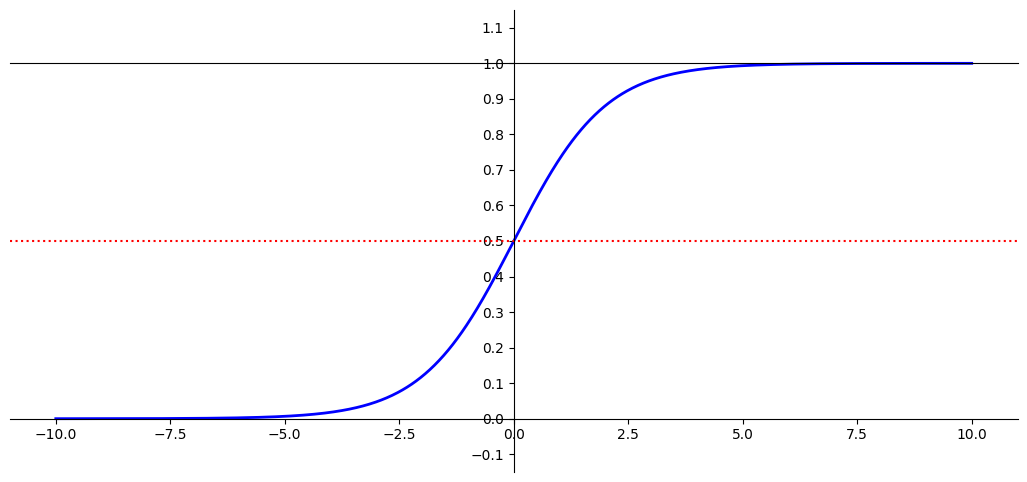

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) 
y = logistic_func(X)

plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

# y 위치에 수평선을 그리는 함수.
# x 위치에 수직선을 그리는 함수(axvline(x=위치))
plt.axhline(y=0.5, color='r', linestyle=':')

plt.ylim(-0.15, 1.15) # y축 범위 지정.
plt.yticks(np.arange(-0.1,1.2,0.1))

ax = plt.gca()
ax.spines['left'].set_position("center")  # spine의 위치를 변경. - 상수
ax.spines['bottom'].set_position(('data', 0)) # 위치 변경 - 이동시킬 위치 값을 지정.
ax.spines['top'].set_position(("data", 1)) 
ax.spines['right'].set_visible(False)# spine을 안보이게 처리.
plt.show()

In [10]:
np.min(y), np.max(y)

(4.5397868702434395e-05, 0.9999546021312976)

In [19]:
"양성" if logistic_func(100) > 0.5  else "음성"# pos

'양성'

## LogisticRegression의 손실 함수(Loss Function)
- **로그 손실함수(log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
-\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - 2진 분류용 Log loss 함수
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 유도한 함수.
\begin{align}
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
\end{align}

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

In [20]:
import numpy as np
np.log(모델이 예측한 정답에 대한 확률)
정답: 1(pos),  pos확률: 0.7, neg 확률: 0.3  => log(0.7)
정답: 0(neg),  pos확률: 0.7, neg 확률: 0.3  => log(0.3)



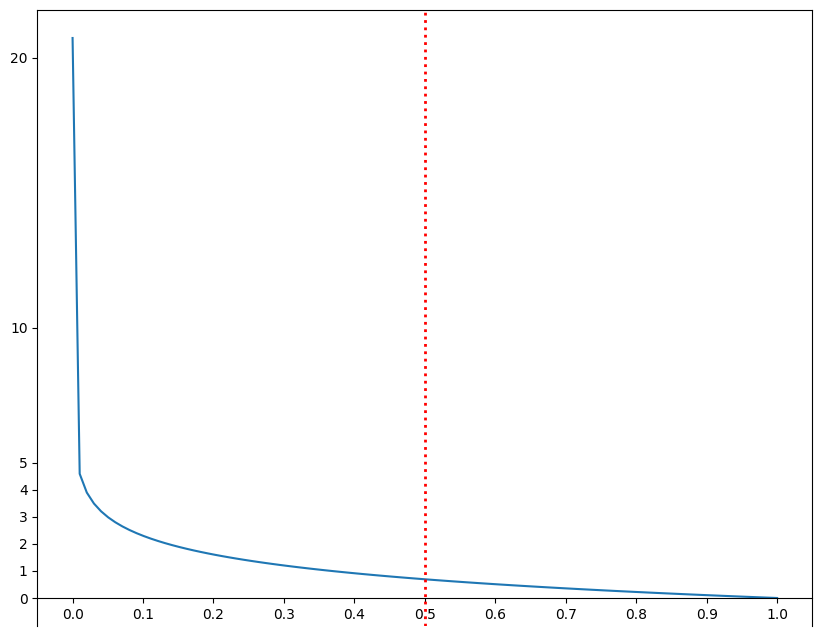

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)   # 정답의 확률(X값)
y = -np.log(X)                         # 오차(log loss)

plt.figure(figsize=(10,8))
plt.plot(X, y)
plt.axvline(0.5, linestyle=':', linewidth=2, color='r')

plt.xticks(np.arange(0,1.1,0.1))
plt.yticks([0,1,2,3,4,5,10,20])
plt.gca().spines['bottom'].set_position(("data", 0))
plt.show()

In [29]:
-np.log(1), -np.log(0.500001)

(-0.0, 0.6931451805619453)

In [34]:
-np.log(0.49999), -np.log(0.1), -np.log(0.01), -np.log(0.000000001)

(0.693167180759948, 2.3025850929940455, 4.605170185988091, 20.72326583694641)

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

## 예제

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("scaler", StandardScaler()), ("model", LogisticRegression(random_state=0))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=0))])

In [6]:
## LR - weight와 bias 를 조회
pipeline.steps[1][1].coef_

array([[-0.53920598, -0.43121045, -0.48894972, -0.57235136, -0.12651259,
         0.44745113, -0.73727937, -0.96309847,  0.10899318,  0.4314711 ,
        -1.32465716, -0.02190933, -0.65639595, -0.840148  , -0.20475766,
         0.66663119,  0.07494071, -0.4407399 ,  0.4149338 ,  0.62652627,
        -0.98445101, -0.97336912, -0.79832217, -0.8674727 , -0.73559409,
        -0.17872566, -0.76379438, -0.86189751, -0.78119307, -0.6077822 ]])

In [7]:
pipeline.steps[1][1].intercept_

array([0.34117272])

In [8]:
# 평가
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

pred_train_proba = pipeline.predict_proba(X_train)
pred_test_proba = pipeline.predict_proba(X_test)

In [9]:
from metrics import print_binary_classification_metrics
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])

정확도: 0.989010989010989
재현율: 0.9929824561403509
정밀도: 0.9895104895104895
F1 점수: 0.9912434325744308
Average Precision: 0.9985893579760078
ROC-AUC Score: 0.9979153766769865


In [10]:
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

정확도: 0.9824561403508771
재현율: 1.0
정밀도: 0.972972972972973
F1 점수: 0.9863013698630136
Average Precision: 0.9974301219609739
ROC-AUC Score: 0.9957010582010581


##### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    "model__C": [0.01, 0.1, 1, 10],    
}
gs = GridSearchCV(
    pipeline,
    params,
    scoring="accuracy", 
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1, param_grid={'model__C': [0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [12]:
gs.best_score_

0.9736259897531439

In [13]:
gs.best_params_

{'model__C': 1}

In [15]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,0.005938,0.002693,0.000641,0.000672,1,{'model__C': 1},0.964912,0.973684,0.982456,0.973451,0.973626,0.006204,1
1,0.007032,0.002973,0.002081,0.001998,0.1,{'model__C': 0.1},0.964912,0.964912,0.991228,0.955752,0.969201,0.013256,2
3,0.009264,0.002915,0.000403,0.000393,10,{'model__C': 10},0.964912,0.973684,0.956140,0.946903,0.960410,0.009964,3
0,0.006584,0.002161,0.001005,0.000008,0.01,{'model__C': 0.01},0.921053,0.947368,0.956140,0.964602,0.947291,0.016328,4
